In [1]:
from google.colab import drive
import os 
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
os.chdir("/content/drive/MyDrive/데이콘/lg")

## Import

In [3]:
import pandas as pd
import random
import os
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor

In [4]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(42) # Seed 고정

## Data Load

In [5]:
train_df = pd.read_csv('/content/drive/MyDrive/데이콘/lg/open/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/데이콘/lg/open/test.csv')

In [6]:
train_x = train_df.filter(regex='X') # Input : X Featrue
train_y = train_df.filter(regex='Y') # Output : Y Feature

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39607 entries, 0 to 39606
Data columns (total 71 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      39607 non-null  object 
 1   X_01    39607 non-null  float64
 2   X_02    39607 non-null  float64
 3   X_03    39607 non-null  float64
 4   X_04    39607 non-null  int64  
 5   X_05    39607 non-null  float64
 6   X_06    39607 non-null  float64
 7   X_07    39607 non-null  float64
 8   X_08    39607 non-null  float64
 9   X_09    39607 non-null  float64
 10  X_10    39607 non-null  float64
 11  X_11    39607 non-null  float64
 12  X_12    39607 non-null  float64
 13  X_13    39607 non-null  float64
 14  X_14    39607 non-null  float64
 15  X_15    39607 non-null  float64
 16  X_16    39607 non-null  float64
 17  X_17    39607 non-null  float64
 18  X_18    39607 non-null  float64
 19  X_19    39607 non-null  float64
 20  X_20    39607 non-null  float64
 21  X_21    39607 non-null  float64
 22

In [ ]:
train_df.describe()

,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,X_10,...,Y_05,Y_06,Y_07,Y_08,Y_09,Y_10,Y_11,Y_12,Y_13,Y_14
count,39607.000000,39607.000000,39607.000000,39607.0,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,...,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000
mean,68.412040,103.320166,68.826354,1.0,102.337203,70.597211,29.407490,164.449320,225.397470,0.002449,...,31.290467,16.529382,3.155054,-26.294839,-26.308623,-22.400062,24.325061,-26.237762,-26.233869,-26.245868
std,2.655983,0.000372,5.151167,0.0,0.548353,2.259820,7.338204,220.402444,66.734725,0.086255,...,2.543222,1.893014,0.418940,0.660537,0.653580,0.920952,0.830197,0.656329,0.655090,0.655989
min,56.268000,103.320000,56.470000,1.0,101.774000,61.726000,14.140000,38.460000,37.580000,0.000000,...,18.589000,-19.963000,0.502000,-29.652000,-29.523000,-31.119000,19.844000,-29.544000,-29.448000,-29.620000
25%,66.465000,103.320000,65.070000,1.0,101.949000,68.864000,27.890000,105.990000,188.540000,0.000000,...,29.768000,16.146000,2.863000,-26.689000,-26.702000,-22.871000,23.836000,-26.630000,-26.624000,-26.640000
50%,68.504000,103.320000,67.270000,1.0,102.006000,69.884000,28.840000,115.040000,234.450000,0.000000,...,31.710000,16.694000,3.126000,-26.254000,-26.266000,-22.275000,24.420000,-26.198000,-26.193000,-26.204000
75%,69.524000,103.320000,71.770000,1.0,103.144000,71.923000,29.870000,132.620000,263.960000,0.000000,...,33.184000,17.164000,3.433500,-25.855000,-25.871000,-21.791000,24.911500,-25.799000,-25.794000,-25.809000
max,84.820000,103.321000,89.170000,1.0,103.160000,87.219000,163.860000,2387.440000,637.490000,3.600000,...,37.250000,18.998000,5.299000,-23.785000,-23.960000,-20.052000,26.703000,-23.722000,-23.899000,-23.856000


In [ ]:
train_df.isnull().sum().sum()

0

In [ ]:
test_df.isnull().sum().sum()

0


# EDA

In [ ]:
train_df.head()

,ID,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,...,Y_05,Y_06,Y_07,Y_08,Y_09,Y_10,Y_11,Y_12,Y_13,Y_14
0,TRAIN_00001,70.544,103.320,67.47,1,101.892,74.983,29.45,62.38,245.71,...,29.632,16.083,4.276,-25.381,-25.529,-22.769,23.792,-25.470,-25.409,-25.304
1,TRAIN_00002,69.524,103.321,65.17,1,101.944,72.943,28.73,61.23,233.61,...,33.179,16.736,3.229,-26.619,-26.523,-22.574,24.691,-26.253,-26.497,-26.438
2,TRAIN_00003,72.583,103.320,64.07,1,103.153,72.943,28.81,105.77,272.20,...,31.801,17.080,2.839,-26.238,-26.216,-22.169,24.649,-26.285,-26.215,-26.370
3,TRAIN_00004,71.563,103.320,67.57,1,101.971,77.022,28.92,115.21,255.36,...,34.503,17.143,3.144,-25.426,-25.079,-21.765,24.913,-25.254,-25.021,-25.345
4,TRAIN_00005,69.524,103.320,63.57,1,101.981,70.904,29.68,103.38,241.46,...,32.602,17.569,3.138,-25.376,-25.242,-21.072,25.299,-25.072,-25.195,-24.974


In [ ]:
train_df['X_04'].value_counts()

1    39607
Name: X_04, dtype: int64

In [ ]:
test_df['X_47'].value_counts()

1    39608
Name: X_47, dtype: int64

In [ ]:
for col in train_df.columns:
    if train_df[col].nunique()==1:
        print(col)

X_04
X_23
X_47
X_48


In [ ]:
for col in test_df.columns:
    if test_df[col].nunique()==1:
        print(col)



X_04
X_23
X_47
X_48


In [ ]:
target_cols = ['Y_' + str(i).zfill(2) for i in range(1, 15)]
target_cols

['Y_01',
 'Y_02',
 'Y_03',
 'Y_04',
 'Y_05',
 'Y_06',
 'Y_07',
 'Y_08',
 'Y_09',
 'Y_10',
 'Y_11',
 'Y_12',
 'Y_13',
 'Y_14']

# X_1, 2, 5, 6
PCB 체결 시 단계별 누름량

In [ ]:
pcb = ['X_' + str(i).zfill(2) for i in [1, 2, 5, 6]]
pcb

['X_01', 'X_02', 'X_05', 'X_06']

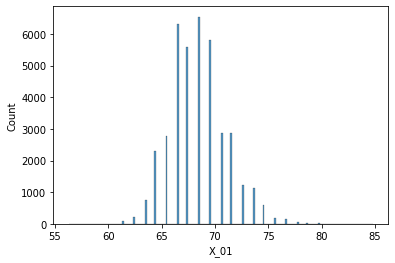

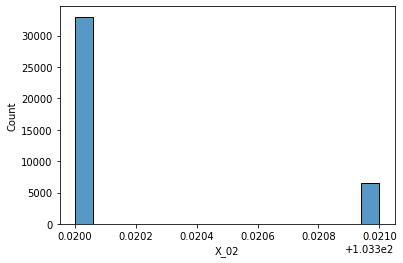

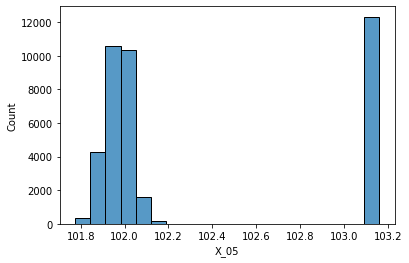

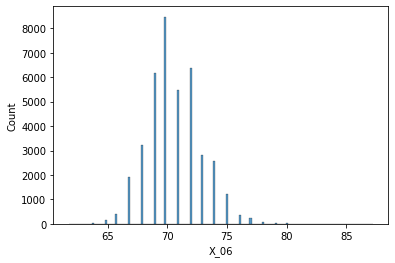

In [ ]:
for col in pcb:
    sns.histplot(data=train_df, x=col)
    plt.show()

In [ ]:
train_df[pcb + target_cols].corr()

,X_01,X_02,X_05,X_06,Y_01,Y_02,Y_03,Y_04,Y_05,Y_06,Y_07,Y_08,Y_09,Y_10,Y_11,Y_12,Y_13,Y_14
X_01,1.000000,-0.084611,0.553974,0.626521,0.028393,0.032328,-0.005171,0.053042,0.011155,-0.007630,-0.038733,0.071421,0.066141,0.034081,0.009947,0.066904,0.068074,0.067083
X_02,-0.084611,1.000000,-0.048915,-0.047862,-0.005138,-0.010092,-0.002252,-0.001451,-0.008923,-0.005153,0.003732,-0.013776,-0.014633,-0.008553,-0.007557,-0.013885,-0.013285,-0.013482
X_05,0.553974,-0.048915,1.000000,0.104653,-0.003528,-0.006990,-0.032955,0.040294,-0.001100,0.016569,-0.019453,0.035862,0.033445,0.001554,0.013407,0.033491,0.034294,0.034546
X_06,0.626521,-0.047862,0.104653,1.000000,0.040484,0.054751,0.031122,0.038120,0.022089,-0.030357,-0.031527,0.073100,0.067113,0.060159,0.012831,0.070004,0.069610,0.069117
Y_01,0.028393,-0.005138,-0.003528,0.040484,1.000000,0.779608,0.873430,0.153883,0.224573,0.301886,-0.142804,0.253041,0.248639,0.394000,0.331565,0.251017,0.251515,0.252830
Y_02,0.032328,-0.010092,-0.006990,0.054751,0.779608,1.000000,0.846287,0.057526,0.165991,0.253647,-0.167178,0.260813,0.257078,0.364331,0.307481,0.258835,0.259878,0.260435
Y_03,-0.005171,-0.002252,-0.032955,0.031122,0.873430,0.846287,1.000000,-0.010916,0.098251,0.190563,-0.034255,0.095567,0.093111,0.247422,0.157009,0.095627,0.096892,0.097676
Y_04,0.053042,-0.001451,0.040294,0.038120,0.153883,0.057526,-0.010916,1.000000,0.705194,0.256564,-0.558652,0.541625,0.536003,0.542056,0.623267,0.540831,0.539100,0.542114
Y_05,0.011155,-0.008923,-0.001100,0.022089,0.224573,0.165991,0.098251,0.705194,1.000000,0.198836,-0.601760,0.536580,0.532131,0.524548,0.685527,0.535203,0.533051,0.538818
Y_06,-0.007630,-0.005153,0.016569,-0.030357,0.301886,0.253647,0.190563,0.256564,0.198836,1.000000,-0.045800,0.415276,0.413373,0.699676,0.410842,0.414966,0.414371,0.414623


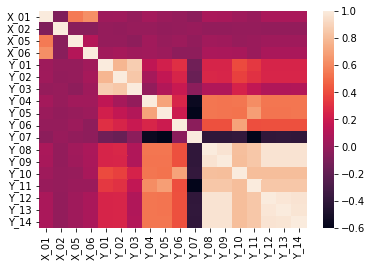

In [ ]:
sns.heatmap(train_df[pcb + target_cols].corr())

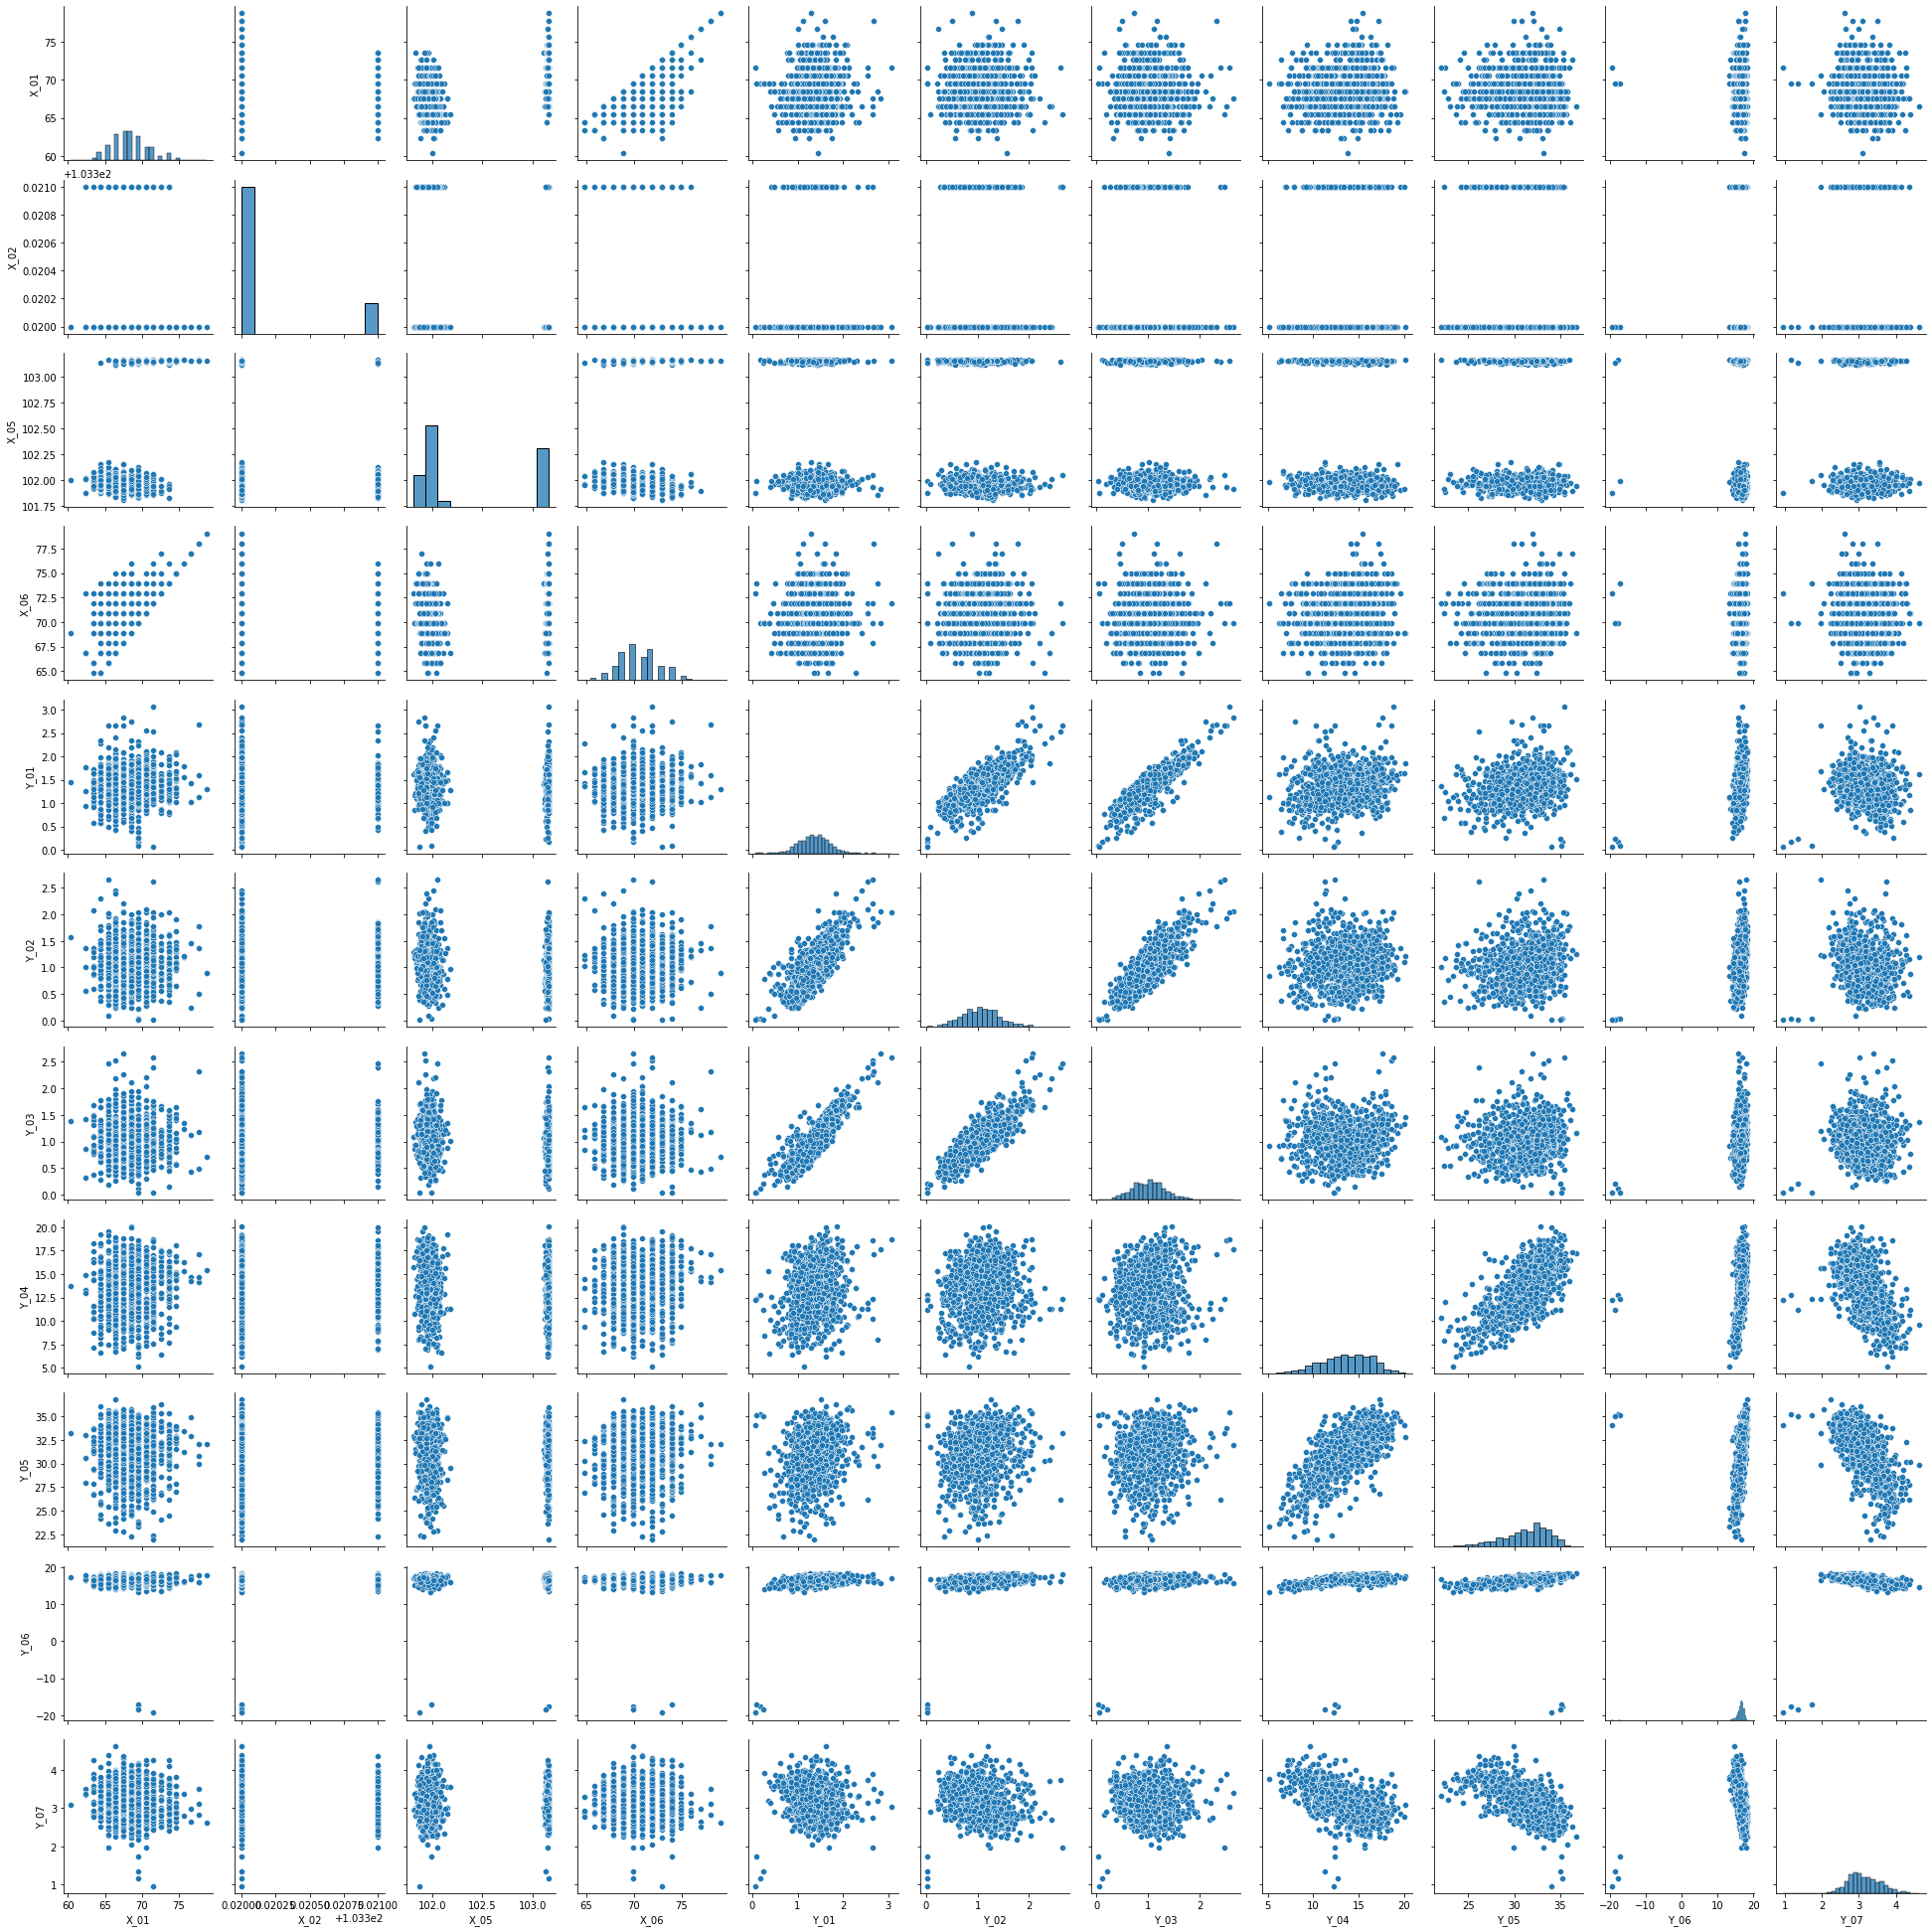

In [ ]:
sns.pairplot(train_df[pcb + target_cols[:7]].sample(1000))

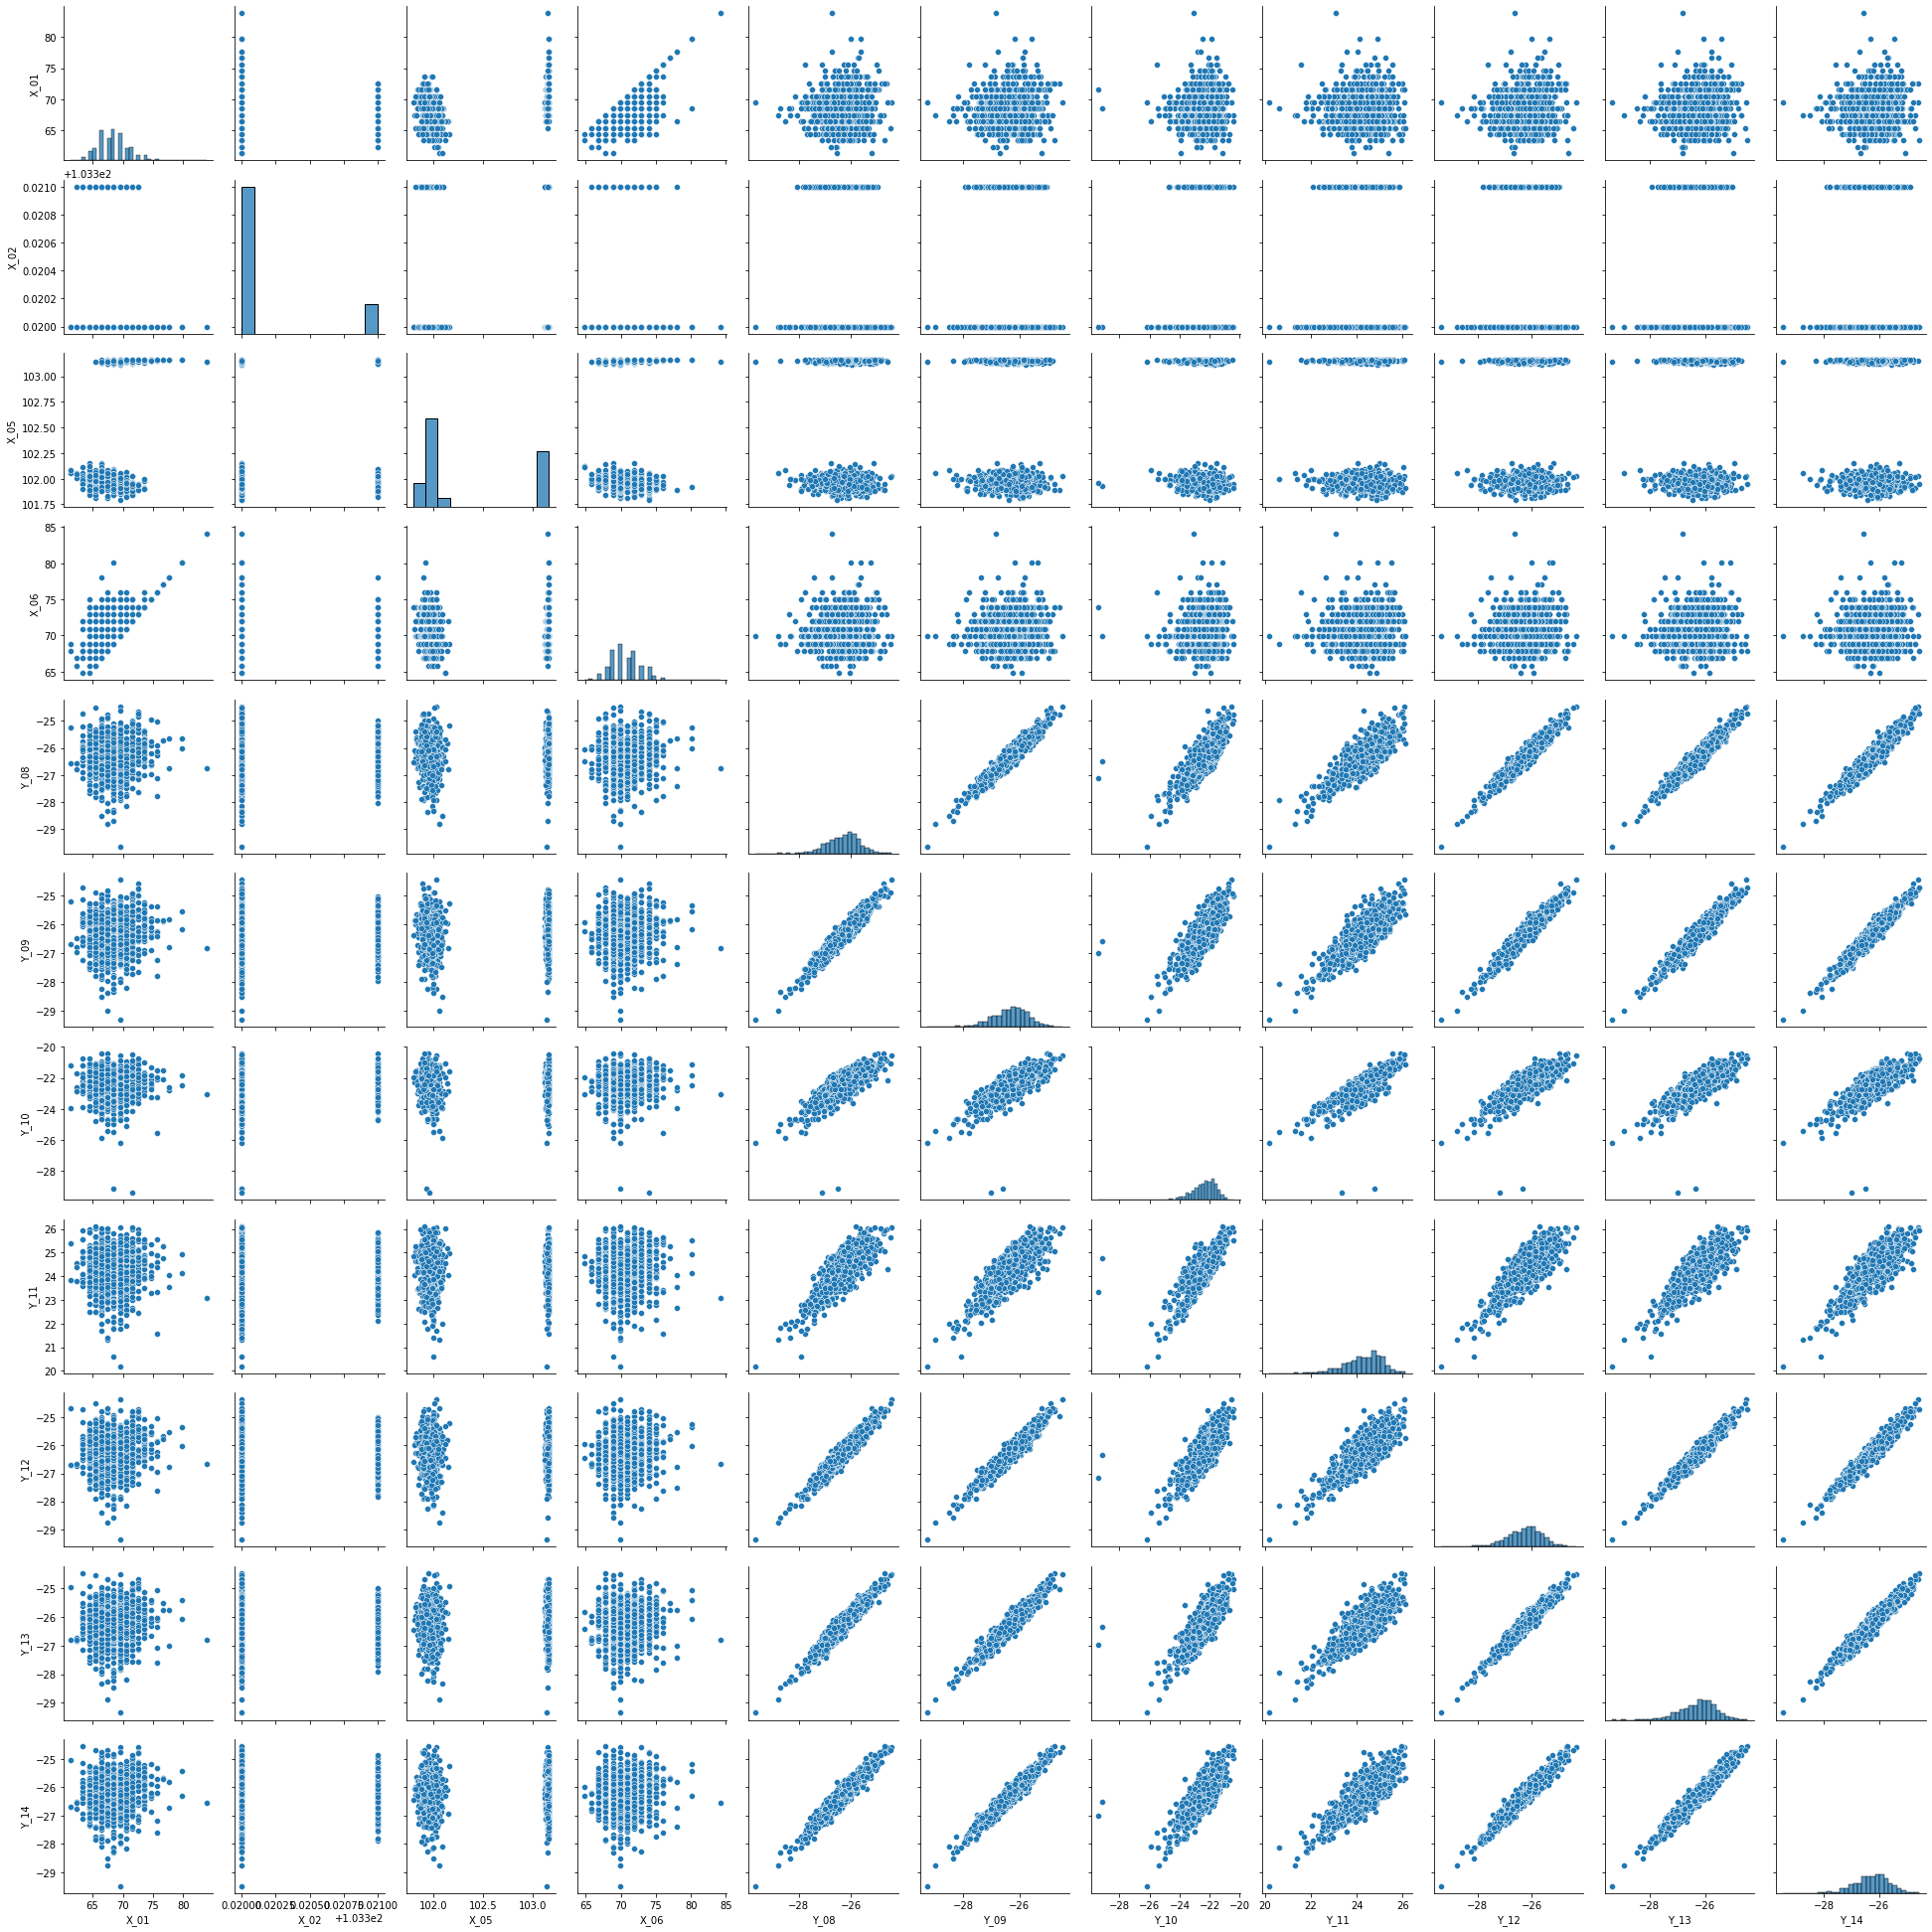

In [ ]:
sns.pairplot(train_df[pcb + target_cols[7:]].sample(1000))

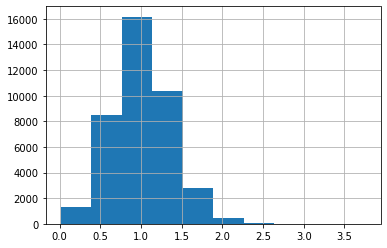

In [ ]:
train_df['Y_03'].hist()

# X_3, 10, 11, 7, 8, 9
방열 재료 무게, 면적

In [ ]:
heat = ['X_' + str(i).zfill(2) for i in [3, 10, 11, 7, 8, 9]]
heat

['X_03', 'X_10', 'X_11', 'X_07', 'X_08', 'X_09']

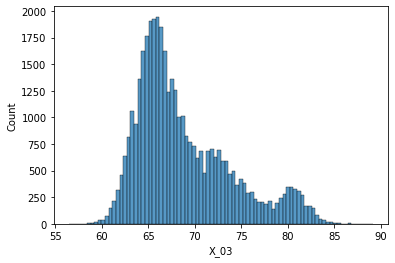

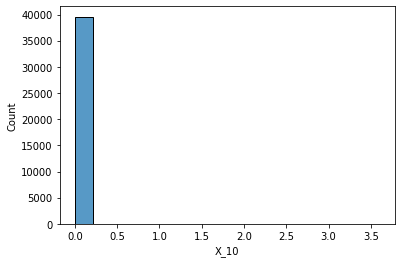

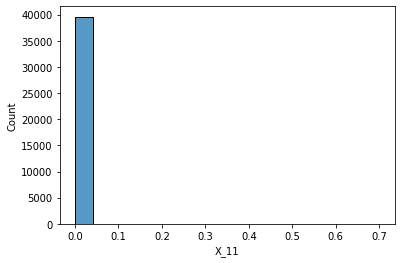

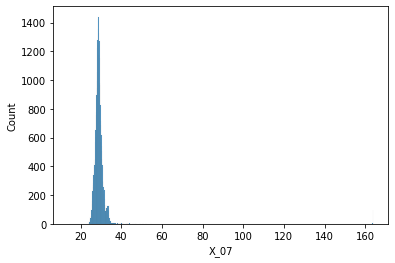

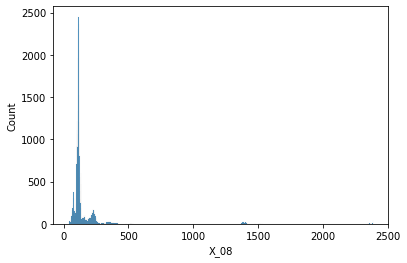

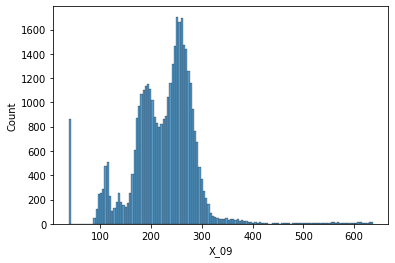

In [ ]:
for col in heat:
    sns.histplot(data=train_df, x=col)
    plt.show()

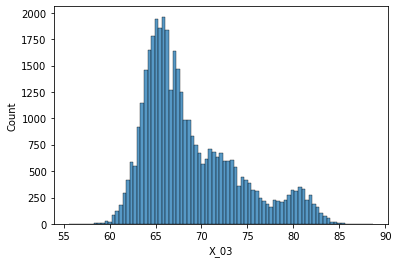

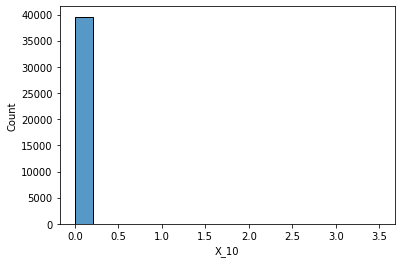

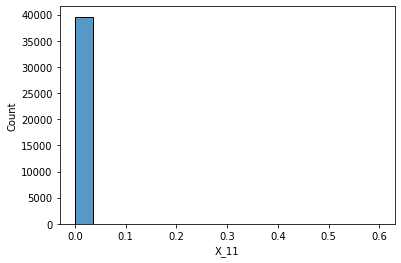

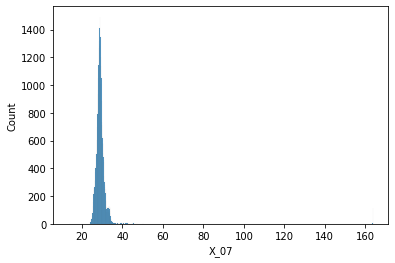

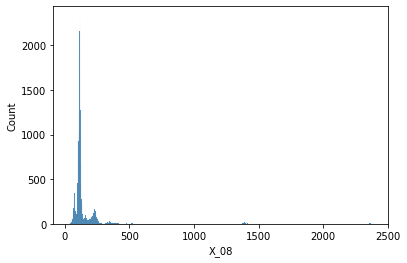

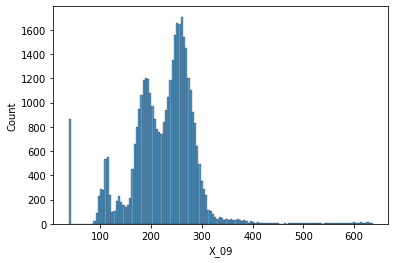

In [ ]:
for col in heat:
    sns.histplot(data=test_df, x=col)
    plt.show()

In [ ]:
train_df['X_10'].value_counts()

0.0    39575
2.9       12
3.0       12
3.3        4
3.1        2
3.6        1
3.2        1
Name: X_10, dtype: int64

In [ ]:
test_df['X_10'].value_counts()

0.0    39575
3.1       12
3.0        8
2.9        5
3.2        4
3.3        2
3.5        1
2.8        1
Name: X_10, dtype: int64

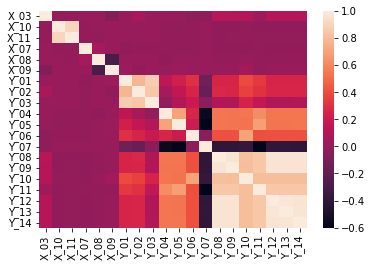

In [ ]:
sns.heatmap(train_df[heat + target_cols].corr())

In [ ]:
antena_pad = ['X_' + str(i).zfill(2) for i in range(13, 19)]
antena_pad

['X_13', 'X_14', 'X_15', 'X_16', 'X_17', 'X_18']

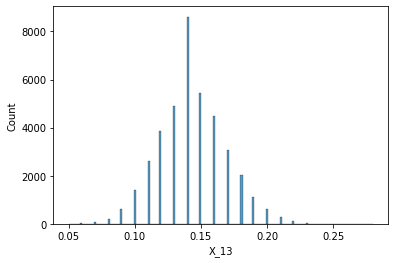

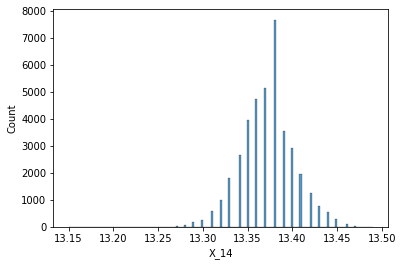

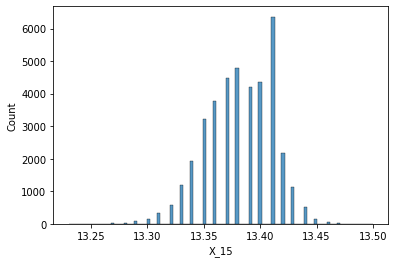

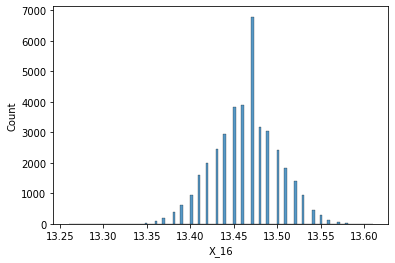

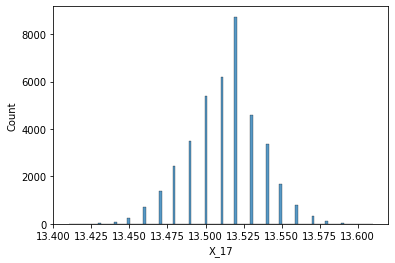

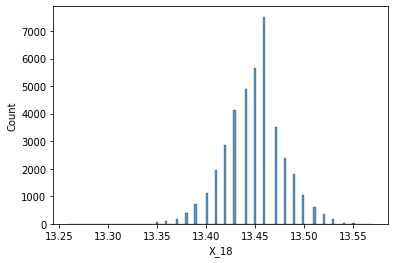

In [ ]:
for col in antena_pad:
    sns.histplot(data=train_df, x=col)
    plt.show()

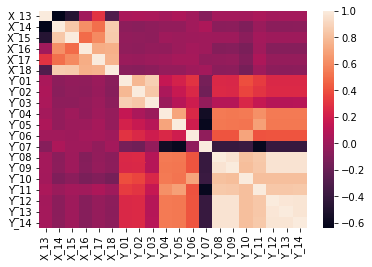

In [ ]:
sns.heatmap(train_df[antena_pad + target_cols].corr())

## 교차검증

In [ ]:
train_df

,ID,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,...,Y_05,Y_06,Y_07,Y_08,Y_09,Y_10,Y_11,Y_12,Y_13,Y_14
0,TRAIN_00001,70.544,103.320,67.47,1,101.892,74.983,29.45,62.38,245.71,...,29.632,16.083,4.276,-25.381,-25.529,-22.769,23.792,-25.470,-25.409,-25.304
1,TRAIN_00002,69.524,103.321,65.17,1,101.944,72.943,28.73,61.23,233.61,...,33.179,16.736,3.229,-26.619,-26.523,-22.574,24.691,-26.253,-26.497,-26.438
2,TRAIN_00003,72.583,103.320,64.07,1,103.153,72.943,28.81,105.77,272.20,...,31.801,17.080,2.839,-26.238,-26.216,-22.169,24.649,-26.285,-26.215,-26.370
3,TRAIN_00004,71.563,103.320,67.57,1,101.971,77.022,28.92,115.21,255.36,...,34.503,17.143,3.144,-25.426,-25.079,-21.765,24.913,-25.254,-25.021,-25.345
4,TRAIN_00005,69.524,103.320,63.57,1,101.981,70.904,29.68,103.38,241.46,...,32.602,17.569,3.138,-25.376,-25.242,-21.072,25.299,-25.072,-25.195,-24.974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39602,TRAIN_39603,66.465,103.320,62.27,1,103.150,66.825,30.20,77.83,298.05,...,29.194,16.582,3.410,-26.486,-26.581,-22.772,24.261,-26.491,-26.584,-26.580
39603,TRAIN_39604,66.465,103.321,62.77,1,102.021,66.825,29.21,102.25,270.67,...,29.859,15.659,3.406,-27.308,-27.203,-24.674,23.427,-27.250,-27.334,-27.325
39604,TRAIN_39605,68.504,103.320,64.67,1,103.144,68.864,29.96,102.61,198.07,...,24.720,16.823,3.215,-26.502,-26.687,-22.577,24.301,-26.388,-26.425,-26.601
39605,TRAIN_39606,66.465,103.320,63.67,1,102.025,67.845,30.30,112.60,275.52,...,26.412,15.757,4.216,-26.760,-26.634,-24.066,23.305,-26.536,-26.751,-26.635


In [ ]:
# X_04
# X_23
# X_47
# X_48

In [ ]:
train_x_drop = train_x.drop(columns=['X_04','X_23','X_47','X_48'], axis=1)

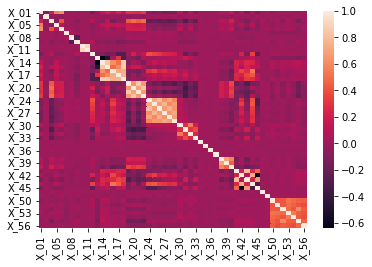

In [ ]:
sns.heatmap(train_x_drop.corr())

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=10, shuffle=True, random_state=20)

In [ ]:

models = []
scores = []


for i, (train_idx, val_idx) in enumerate(kf.split(train_x_drop)):
    
    train_feature = train_x_drop.iloc[train_idx]
    val_data_feature = train_x_drop.iloc[val_idx]
    
    train_label = train_y.iloc[train_idx]
    val_data_label = train_y.iloc[val_idx]
    
    # 모델 객체
    model = MultiOutputRegressor(LinearRegression()).fit(train_feature, train_label)
    # model = LinearRegression()    
    # model.fit(train_feature, train_label)
    models.append(model)
    
    val_score = model.score(val_data_feature, val_data_label)
    scores.append(val_score)
    print(i, np.round(val_score, 4))

print("*"*20)
print(np.round(np.mean(scores), 4))


0 0.0411
1 0.0389
2 0.0409
3 0.0346
4 0.0354
5 0.032
6 0.0376
7 0.0301
8 0.0322
9 0.0412
********************
0.0364


## Regression Model Fit

In [ ]:
# LR = MultiOutputRegressor(LinearRegression()).fit(train_x, train_y)
# print('Done.')

## Inference

In [ ]:
test_x = pd.read_csv('/content/drive/MyDrive/데이콘/lg/open/test.csv').drop(columns=['ID'])

In [ ]:
test_x = test_x.drop(columns=['X_04','X_23','X_47','X_48'], axis=1)

In [ ]:
preds = model.predict(test_x)
print('Done.')

Done.


## Submit

In [ ]:
submit = pd.read_csv('/content/drive/MyDrive/데이콘/lg/open/sample_submission.csv')

In [ ]:
for idx, col in enumerate(submit.columns):
    if col=='ID':
        continue
    submit[col] = preds[:,idx-1]
print('Done.')

Done.


In [ ]:
submit

,ID,Y_01,Y_02,Y_03,Y_04,Y_05,Y_06,Y_07,Y_08,Y_09,Y_10,Y_11,Y_12,Y_13,Y_14
0,TEST_00001,1.459906,1.190724,1.136160,12.893404,30.936988,16.319558,3.218215,-26.138230,-26.154434,-22.169402,24.452368,-26.084627,-26.080940,-26.095807
1,TEST_00002,1.502645,1.216676,1.150904,13.194005,30.890919,16.516941,3.190178,-26.114471,-26.123961,-22.261980,24.403919,-26.057674,-26.054705,-26.068736
2,TEST_00003,1.379030,1.066168,1.020927,14.484207,31.714215,16.250593,3.072459,-26.098553,-26.116643,-22.372452,24.412599,-26.041198,-26.042363,-26.051692
3,TEST_00004,1.356364,1.046103,0.968449,15.235465,32.168391,16.608210,2.989584,-26.085362,-26.104318,-22.209116,24.487205,-26.034758,-26.031571,-26.039949
4,TEST_00005,1.311117,0.957095,0.933878,14.390176,31.117338,16.351798,3.160284,-26.190298,-26.213180,-22.522652,24.215827,-26.138620,-26.130906,-26.144183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39603,TEST_39604,1.371773,1.053153,1.061295,13.007405,31.214597,16.930783,3.205908,-26.558958,-26.553734,-22.527425,24.257104,-26.484281,-26.478453,-26.490266
39604,TEST_39605,1.329545,1.010892,1.015148,13.543028,31.714762,16.974167,3.099540,-26.548947,-26.542656,-22.515613,24.322137,-26.476398,-26.472715,-26.486770
39605,TEST_39606,1.337700,1.000304,1.011971,14.043615,31.915282,17.064832,3.112841,-26.532058,-26.532326,-22.496499,24.336012,-26.471007,-26.463814,-26.472826
39606,TEST_39607,1.334923,0.999807,1.021081,13.516416,31.448107,16.945810,3.183581,-26.532401,-26.530660,-22.558104,24.265297,-26.466421,-26.463245,-26.476099


In [ ]:
# submit.to_csv('/content/drive/MyDrive/데이콘/lg/submit/0803_submit03.csv', index=False)